In [1]:
#%matplotlib nbagg

In [2]:
import numpy
import matplotlib.pyplot as plt

from sidpy import *

from mpl_toolkits.mplot3d import Axes3D

import matplotlib
import matplotlib.cm as cmx
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 18)

In [3]:
p_max = 5
is_multirealization = False

pow_upperbound = 2./3

In [4]:
# Causal
x = numpy.loadtxt('../example-data/data-tarx/x-4.dat', delimiter = ',')
y = numpy.loadtxt('../example-data/data-tarx/y-4.dat', delimiter = ',')

# Non-causal
# x = numpy.loadtxt('../example-data/data-tarx/y.dat', delimiter = ',')
# y = numpy.loadtxt('../example-data/data-tarx/x.dat', delimiter = ',')

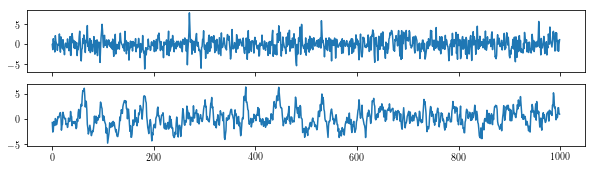

In [5]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (10, 2.5))

ax[0].plot(x[:1000])
ax[1].plot(y[:1000])

In [6]:
print('Choosing p* for the SPO framework:')
p_opt_o, mse_opt, mse_by_p, kstar_by_p = choose_model_order_mse(x, p_max, pow_upperbound = pow_upperbound, nn_package = 'sklearn', is_multirealization = is_multirealization, announce_stages = False, output_verbose = False)

print('\nChose p* = {}...'.format(p_opt_o))

print('Choosing q* in the SPO framework:')
q_opt_spo, p_opt_spo, mse_opt, mse_by_qp_spo, kstar_by_qp = choose_model_order_io_mse(y, x, q_max = p_max, p_fix = p_opt_o, pow_upperbound = pow_upperbound, nn_package = 'sklearn', is_multirealization = is_multirealization, announce_stages = False, output_verbose = True)

print('\nChose (q* = {}, p* = {})...'.format(q_opt_spo, p_opt_spo))

print('Choosing q* outside the SPO framework:')
q_opt_iopo, p_opt_iopo, mse_opt, mse_by_qp_iopo, kstar_by_qp = choose_model_order_io_mse(y, x, q_max = p_max, p_fix = None, p_max = p_max, pow_upperbound = pow_upperbound, nn_package = 'sklearn', is_multirealization = is_multirealization, announce_stages = False, output_verbose = True)

#p_opt, nlpl_opt, nlpl_by_p = choose_model_order_nlpl(x, p_max, pow_upperbound = 0.5, nn_package = 'sklearn', is_multirealization = is_multirealization, announce_stages = False, output_verbose = True)

print('\nChose (q* = {}, p* = {})...'.format(q_opt_iopo, p_opt_iopo))

Choosing p* for the SPO framework:

Chose p* = 2...
Choosing q* in the SPO framework:
For (q = 0, p = 2) chose k* = 248 with MSE(k*) = 2.81617982545
For (q = 1, p = 2) chose k* = 86 with MSE(k*) = 2.58078245671
For (q = 2, p = 2) chose k* = 180 with MSE(k*) = 2.60106602947
For (q = 3, p = 2) chose k* = 112 with MSE(k*) = 2.60233424967
For (q = 4, p = 2) chose k* = 69 with MSE(k*) = 2.61148573204
For (q = 5, p = 2) chose k* = 51 with MSE(k*) = 2.62413370896

Chose (q* = 1, p* = 2)...
Choosing q* outside the SPO framework:
For (q = 1, p = 0) chose k* = 253 with MSE(k*) = 2.93013389236
For (q = 2, p = 0) chose k* = 221 with MSE(k*) = 2.94043169844
For (q = 3, p = 0) chose k* = 276 with MSE(k*) = 2.93523300168
For (q = 4, p = 0) chose k* = 286 with MSE(k*) = 2.93046678378
####################################################
# Warning: For (q = 4, p = 0), Nelder-Mead is choosing k* near k_upper = 293.
# Increase pow_upperbound.
####################################################
For (q = 5

In [7]:
print('\n\nFor  SPO: (q* = {}, p* = {})\nFor IOPO: (q* = {}, p_io* = {}, p_o* = {})'.format(q_opt_spo, p_opt_o, q_opt_iopo, p_opt_iopo, p_opt_o))



For  SPO: (q* = 1, p* = 2)
For IOPO: (q* = 1, p_io* = 1, p_o* = 2)


q | p 	0	1	2	3	4	5	
0 |	2.9173	2.8378	2.8162	2.8184	2.8336	2.8518	
1 |	2.9301	2.5565	2.5808	2.5991	2.6219	2.6558	
2 |	2.9404	2.5763	2.6011	2.6082	2.6209	2.6517	
3 |	2.9352	2.5853	2.6023	2.6114	2.6252	2.6583	
4 |	2.9305	2.6006	2.6115	2.6314	2.6388	2.6637	
5 |	2.9271	2.6125	2.6241	2.6403	2.6504	2.6644	


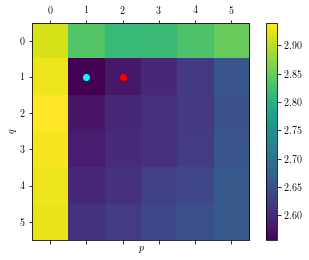

In [8]:
fig, ax = plt.subplots()
cax = ax.matshow(mse_by_qp_iopo)
ax.set_xlabel('$p$')
ax.set_ylabel('$q$')
ax.scatter(p_opt_iopo, q_opt_iopo, color = 'cyan')
ax.scatter(p_opt_o, q_opt_spo, color = 'red')
cbar = fig.colorbar(cax)

print_string = 'q | p \t'
for j in range(mse_by_qp_iopo.shape[1]):
    print_string += '{}\t'.format(j)

print(print_string)

for i in range(mse_by_qp_iopo.shape[0]):
    print_string = '{} |\t'.format(i)
    for j in range(mse_by_qp_iopo.shape[1]):
      print_string += '{:.5}\t'.format(mse_by_qp_iopo[i, j])
    
    print(print_string)

In [9]:
p = p_opt_o
q = q_opt_spo
delay = 0

if q == 0:
    lTEs = numpy.zeros(y.shape)
    TE = 0
else:
    lTEs, TE = estimate_lte(y, x, q, p, delay, k = 5)

# estimate_lte_iopo(y, x, q, p_io, p_o, delay, k = 5):

lTEs_iopo, TE_iopo = estimate_lte_iopo(y, x, q_opt_iopo, p_opt_iopo, p_opt_o, delay, k = 5)

print('The estimated Total Transfer Entropy is {} (SPO) and {} (IOPO)'.format(TE, TE_iopo))

The estimated Total Transfer Entropy is 0.0952902917857 (SPO) and 0.0934159346442 (IOPO)


In [10]:
q = q_opt_spo

sTEs = estimate_ste(y, x, q, p, delay, lTEs, pow_neighbors = 0.50, verbose = False)

sTEs_iopo = estimate_ste_iopo(y, x, q_opt_iopo, p_opt_iopo, p_opt_o, delay, lTEs_iopo, pow_neighbors = 0.5, verbose = False)

(-0.41521809820746669, 0.56738579090794339)

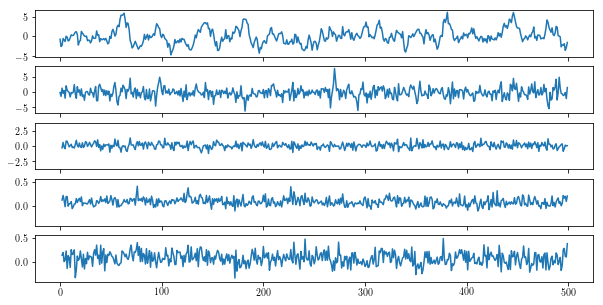

In [11]:
fig, ax = plt.subplots(5, 1, sharex = True, figsize = (10, 5))

plot_to = 500

ax[0].plot(y[:plot_to])
ax[1].plot(x[:plot_to])
ax[2].plot(lTEs[:plot_to])
ax[2].set_ylim([-4, 4])
ax[3].plot(sTEs[:plot_to])
ax[4].plot(sTEs_iopo[:plot_to])
y_range = [numpy.nanmin([sTEs, sTEs_iopo]), numpy.nanmax([sTEs, sTEs_iopo])]
ax[3].set_ylim(y_range)
ax[4].set_ylim(y_range)
#ax[3].set_ylim([-1, 1])

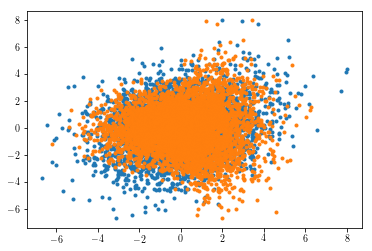

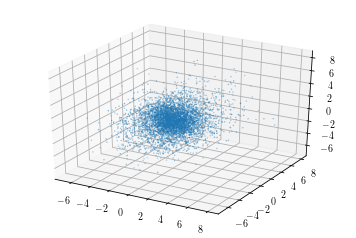

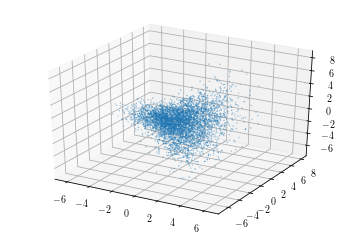

In [12]:
plt.figure()
plt.plot(x[:-1], x[1:], '.')
plt.plot(y[:-1], x[1:], '.')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:-2], x[1:-1], x[2:], s = 0.1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y[1:-1], x[1:-1], x[2:], s = 0.1)